In [14]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [15]:
pip install torch

In [16]:
pip install torchvision

In [17]:
pip install torchaudio

In [18]:
import torch
torch.__version__

'2.1.0+cu118'

In [19]:
! [ -e /content ] && pip install -Uqq fastai

In [20]:
import fastai
fastai.__version__

'2.7.13'

In [21]:
from fastai.tabular.all import*

In [22]:
import os
print (os.getcwd())

/content


In [1]:
from google.colab import files
uploaded = files.upload()

Saving flowers.zip to flowers.zip


In [2]:
import zipfile
with zipfile.ZipFile("flowers.zip", 'r') as zip_ref:
    zip_ref.extractall("flowers")

In [3]:
import os
contents = os.listdir("flowers")
print(contents)

['flowers']


In [4]:
from fastai.vision.all import *

In [5]:
path = Path("/content/flowers")

files = get_image_files(path)

len(files)

4323

In [6]:
files[0],files[1500]

(Path('/content/flowers/flowers/dandelion/34234226791_63a2afc7ed_n.jpg'),
 Path('/content/flowers/flowers/sunflower/20344366953_44fb51051b.jpg'))

In [22]:
from fastai.vision.all import *

# Define the path to the dataset
path = Path("/content/flowers/flowers")

# Create a DataBlock to load and label images
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(150),
    splitter=RandomSplitter(valid_pct=0.2),
)

# Create DataLoaders
dls = flowers.dataloaders(path)









/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


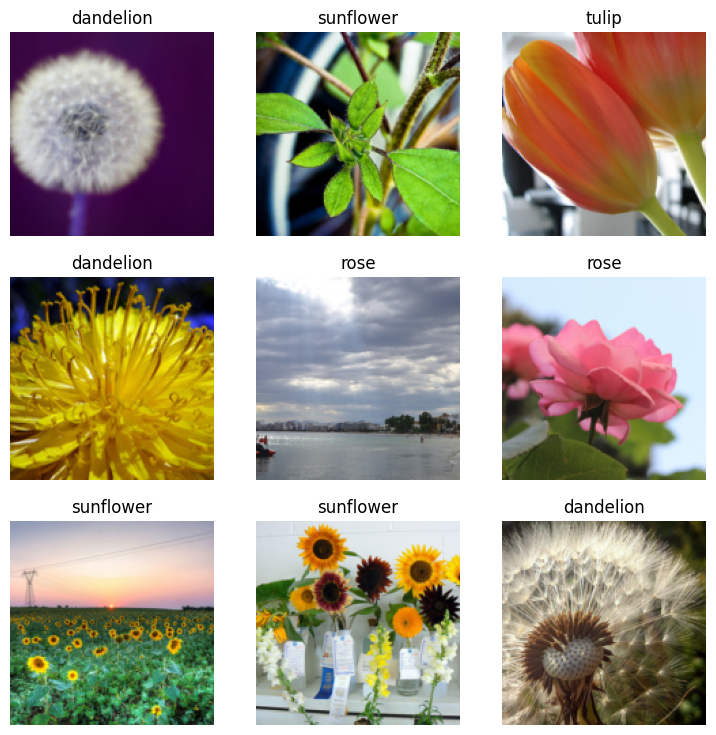

In [23]:
dls.show_batch()

In [24]:
learn=cnn_learner(dls,resnet34,metrics=[error_rate,accuracy])
learn.summary()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 115MB/s]


Sequential (Input shape: 64 x 3 x 150 x 150)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 75 x 75   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 38 x 38   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [25]:
learn.predict(files[0])

('sunflower', tensor(3), tensor([0.0863, 0.0219, 0.1979, 0.5616, 0.1323]))

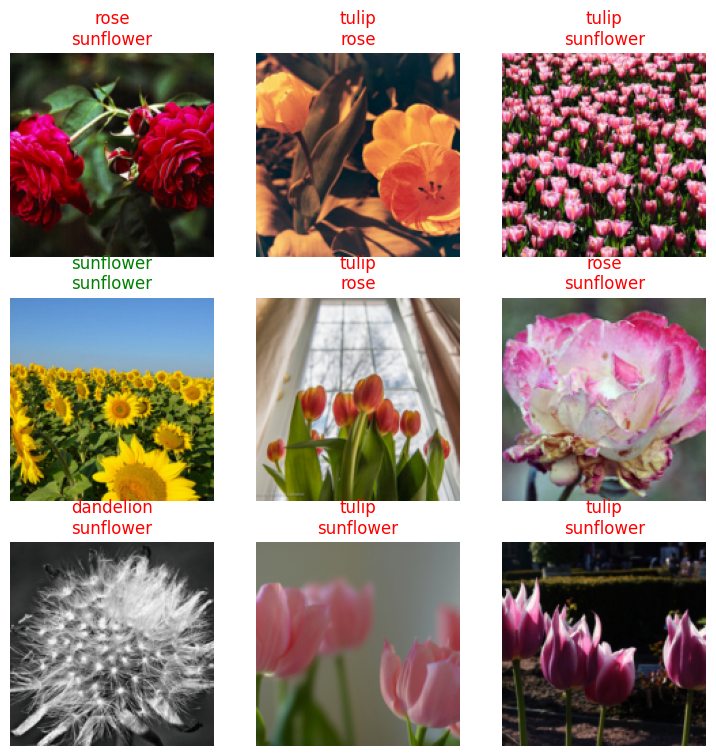

In [26]:
learn.show_results()

SuggestedLRs(valley=0.0014454397605732083)

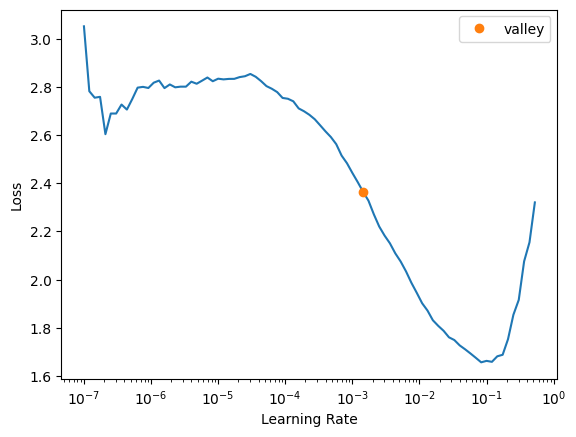

In [27]:
learn.lr_find()

In [28]:
learn.fine_tune(1,0.001)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.337302,0.495471,0.179398,0.820602,09:19


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.562314,0.376114,0.122685,0.877315,13:37


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


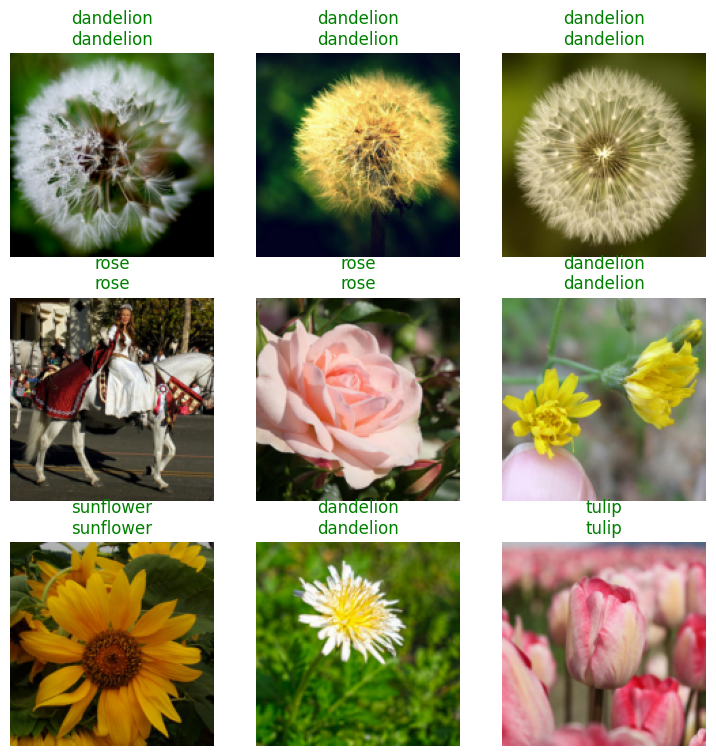

In [29]:
learn.show_results()